In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
from numpy.linalg import norm

In [3]:
# make random test data
frame0 = np.random.rand(2, 640) * 512
frame1 = np.random.rand(2, 600) * 512
frames = (frame0, frame1)

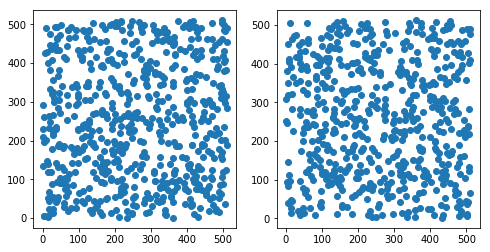

In [4]:
fig, axs = plt.subplots(1, len(frames), figsize=(4 * len(frames), 4))
for ax, frame in zip(axs, frames):
    ax.scatter(frame[1], frame[0])

In [5]:
def gleb_meth(frames, radius):
    d = np.array([np.subtract.outer(*coords) for coords in zip(*frames)])
    r = norm(d, axis=0)
    return np.argwhere(r < radius)

In [6]:
from scipy.spatial import cKDTree

In [70]:
def kd_meth(frames, radius):
    frame0, frame1 = frames
    t0 = cKDTree(frame0.T)
    t1 = cKDTree(frame1.T)
    pair_matches = t0.query_ball_tree(t1, radius)
    # take only the first match
    return np.array([(i, p) for i, pair in enumerate(pair_matches) for p in pair if len(pair)])

In [71]:
def plot_frames(frames, radius):
    group_gleb = gleb_meth(frames, radius)
    group_kd = kd_meth(frames, radius)
    gleb_pairs = [np.array([frame[:,pair] for frame, pair in zip(frames, pairs)]).T for pairs in group_gleb]
    kd_pairs = [np.array([frame[:,pair] for frame, pair in zip(frames, pairs)]).T for pairs in group_kd]
    fig, axs = plt.subplots(1, len(frames), figsize=(4 * len(frames), 4))
    for ax, pairs in zip(axs, (gleb_pairs, kd_pairs)):
        for i, (frame_y, frame_x) in enumerate(frames):
            ax.scatter(frame_x, frame_y, s=2, label="Frame {}".format(i))
        for pair_y, pair_x in pairs:
            ax.scatter(pair_x, pair_y)
            y, x = pair_y.mean(), pair_x.mean()
            c = plt.Circle((x, y), radius=radius, color='c', linewidth=3,
               fill=False)
            ax.add_patch(c)
    ax.legend(loc="best")

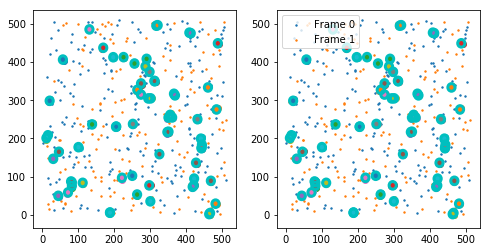

In [72]:
frame0 = np.random.rand(2, np.random.randint(500)) * 512
frame1 = np.random.rand(2, np.random.randint(500)) * 512
frames = (frame0, frame1)
plot_frames(frames, 10)

In [73]:
for i in range(100):
    frame0 = np.random.rand(2, np.random.randint(1, 2000)) * 512
    frame1 = np.random.rand(2, np.random.randint(1, 2000)) * 512
    frames = (frame0, frame1)
    r = np.random.rand() * 100
    g = gleb_meth(frames, r)
    kd = kd_meth(frames, r)
    if kd.size or g.size:
        assert np.array_equal(g, kd)

In [74]:
import tqdm

For 50 peaks and a grouping radius of 1 ...
time for Gleb ...The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
115 µs ± 83.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...97.2 µs ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.1802812492
For 100 peaks and a grouping radius of 1 ...
time for Gleb ...185 µs ± 46.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...157 µs ± 31 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.17422336518
For 150 peaks and a grouping radius of 1 ...
time for Gleb ...520 µs ± 113 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...233 µs ± 23.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.2258061032
For 200 peaks and a grouping radius of 1 ...
time for Gleb ...The slowest run took 8.88 times longer than the fastest. Thi

For 50 peaks and a grouping radius of 2 ...
time for Gleb ...155 µs ± 66.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...104 µs ± 24 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.48762105557
For 100 peaks and a grouping radius of 2 ...
time for Gleb ...195 µs ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...149 µs ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.31477682331
For 150 peaks and a grouping radius of 2 ...
time for Gleb ...314 µs ± 57.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...176 µs ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.78439815649
For 200 peaks and a grouping radius of 2 ...
time for Gleb ...524 µs ± 66.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...321 µs ± 67.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / K

For 50 peaks and a grouping radius of 3 ...
time for Gleb ...72.1 µs ± 40.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...74.2 µs ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 0.971893918163
For 100 peaks and a grouping radius of 3 ...
time for Gleb ...207 µs ± 87 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...129 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.60941754404
For 150 peaks and a grouping radius of 3 ...
time for Gleb ...358 µs ± 67.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...215 µs ± 44.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.66151162796
For 200 peaks and a grouping radius of 3 ...
time for Gleb ...579 µs ± 71 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...201 µs ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / 

For 50 peaks and a grouping radius of 4 ...
time for Gleb ...135 µs ± 58.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...118 µs ± 25.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.14786050432
For 100 peaks and a grouping radius of 4 ...
time for Gleb ...200 µs ± 84.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...167 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.20149196912
For 150 peaks and a grouping radius of 4 ...
time for Gleb ...464 µs ± 156 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...228 µs ± 50 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.03523705875
For 200 peaks and a grouping radius of 4 ...
time for Gleb ...609 µs ± 116 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...289 µs ± 59.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD)

For 50 peaks and a grouping radius of 5 ...
time for Gleb ...85.2 µs ± 47.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...87.4 µs ± 26.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 0.974347229165
For 100 peaks and a grouping radius of 5 ...
time for Gleb ...154 µs ± 37.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...120 µs ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.27868399123
For 150 peaks and a grouping radius of 5 ...
time for Gleb ...368 µs ± 107 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...196 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.87957605573
For 200 peaks and a grouping radius of 5 ...
time for Gleb ...472 µs ± 70.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...188 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb

For 50 peaks and a grouping radius of 6 ...
time for Gleb ...The slowest run took 4.04 times longer than the fastest. This could mean that an intermediate result is being cached.
87.7 µs ± 54.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...82.2 µs ± 39.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.06684347016
For 100 peaks and a grouping radius of 6 ...
time for Gleb ...149 µs ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...117 µs ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.27551720112
For 150 peaks and a grouping radius of 6 ...
time for Gleb ...282 µs ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...166 µs ± 8.67 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.69739513088
For 200 peaks and a grouping radius of 6 ...
time for Gleb ...388 µs ± 52.1 µs per loop (mean ± std. dev. of 7 runs,

For 50 peaks and a grouping radius of 7 ...
time for Gleb ...114 µs ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...87.6 µs ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.29772206179
For 100 peaks and a grouping radius of 7 ...
time for Gleb ...161 µs ± 35.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...139 µs ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.15789036157
For 150 peaks and a grouping radius of 7 ...
time for Gleb ...411 µs ± 91.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...216 µs ± 58.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.89952565306
For 200 peaks and a grouping radius of 7 ...
time for Gleb ...573 µs ± 89.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...307 µs ± 49.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb 

For 50 peaks and a grouping radius of 8 ...
time for Gleb ...82.4 µs ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...105 µs ± 32.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 0.781020386137
For 100 peaks and a grouping radius of 8 ...
time for Gleb ...164 µs ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...135 µs ± 24.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.20798870032
For 150 peaks and a grouping radius of 8 ...
time for Gleb ...360 µs ± 79.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...194 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.85285954858
For 200 peaks and a grouping radius of 8 ...
time for Gleb ...640 µs ± 125 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...272 µs ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / 

For 50 peaks and a grouping radius of 9 ...
time for Gleb ...The slowest run took 4.60 times longer than the fastest. This could mean that an intermediate result is being cached.
97.3 µs ± 78.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...96.8 µs ± 30.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.00473308247
For 100 peaks and a grouping radius of 9 ...
time for Gleb ...174 µs ± 52.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...153 µs ± 31.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.13872967462
For 150 peaks and a grouping radius of 9 ...
time for Gleb ...412 µs ± 128 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...198 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.07711575352
For 200 peaks and a grouping radius of 9 ...
time for Gleb ...586 µs ± 129 µs per loop (mean ± std. dev. of 7 runs, 10 

For 50 peaks and a grouping radius of 10 ...
time for Gleb ...63.8 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...85 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 0.750707983955
For 100 peaks and a grouping radius of 10 ...
time for Gleb ...134 µs ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...145 µs ± 22.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 0.928022965057
For 150 peaks and a grouping radius of 10 ...
time for Gleb ...377 µs ± 69.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...216 µs ± 35.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.74366185118
For 200 peaks and a grouping radius of 10 ...
time for Gleb ...449 µs ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...222 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (

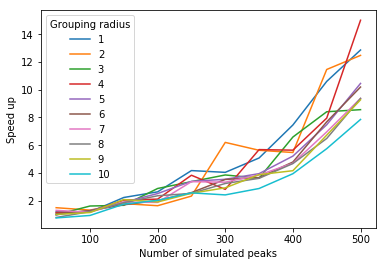

In [75]:
all_speed_ups = []
for r in tqdm.tqdm_notebook(range(1, 11)):
    speed_up = []
    num_peaks = []
    for i in tqdm.tqdm_notebook(range(50, 501, 50)):
        frame0 = np.random.rand(2, i) * 512
        frame1 = np.random.rand(2, i) * 512
        frames = (frame0, frame1)
        print("For", frame0.shape[1], "peaks and a grouping radius of", r,"...")
        print("time for Gleb ...", end="")
        g = %timeit -n10 -o gleb_meth(frames, r)
        print("time for KD ...", end="")
        kd = %timeit -n10 -o kd_meth(frames, r)
        num_peaks.append(i)
        speed_up.append((np.mean(g.all_runs) / g.loops) / (np.mean(kd.all_runs) / kd.loops))
        print("speed up is (Gleb / KD)", speed_up[-1])
    plt.plot(num_peaks, speed_up, label=r)
    all_speed_ups.append(speed_up)
plt.xlabel("Number of simulated peaks")
plt.ylabel("Speed up")
plt.legend(title="Grouping radius")
plt.savefig("Comparison.png")

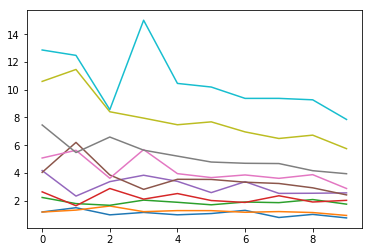

In [76]:
plt.plot(all_speed_ups)

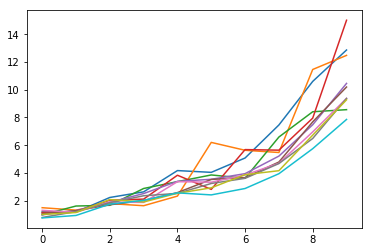

In [77]:
plt.plot(np.array(all_speed_ups).T)

In [14]:
plt.savefig("Comparison.png")

In [15]:
%timeit t0 = cKDTree(frame0.T)
%timeit t1 = cKDTree(frame1.T)

74.2 µs ± 486 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
72.7 µs ± 879 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


---
# Split

In [19]:
import pandas as pd

## Testing groupby mutability

In [48]:
df_temp = pd.DataFrame(np.random.randint(3, size=(10, 3)), columns=["A", "B", "C"])
df_temp

,A,B,C
0,1,2,2
1,2,0,2
2,0,1,2
3,2,1,1
4,2,2,2
5,1,1,1
6,1,2,1
7,2,2,0
8,2,0,0
9,2,1,0


In [50]:
for name, group in df_temp.groupby("A"):
    print(name)
    print(group)
    df_temp.C.loc[group.index] = 1
df_temp

0
   A  B  C
2  0  1  1
1
   A  B  C
0  1  2  1
5  1  1  1
6  1  2  1
2
   A  B  C
1  2  0  1
3  2  1  1
4  2  2  1
7  2  2  1
8  2  0  1
9  2  1  1


,A,B,C
0,1,2,1
1,2,0,1
2,0,1,1
3,2,1,1
4,2,2,1
5,1,1,1
6,1,2,1
7,2,2,1
8,2,0,1
9,2,1,1


In [52]:
df.groupby("frame").ge

KeyError: 'Column not found: 0'

In [487]:
num_peaks_per_frame = 200
frames = 5000
num_peaks = frames * num_peaks_per_frame
df = pd.DataFrame(dict(x=np.random.rand(num_peaks) * 512,
                       y=np.random.rand(num_peaks) * 512,
                       frame=np.random.randint(frames, size=num_peaks)
                      )).sort_values("frame").reset_index(drop=True)

df["group_id"] = -1

In [269]:
import warnings

In [488]:
# add column of group ids
def kd_meth(frames, radius):
    frame0, frame1 = frames
    t0 = cKDTree(frame0)
    t1 = cKDTree(frame1)
    pair_matches = t0.query_ball_tree(t1, radius)
    # take only the first match
    return pair_matches

In [489]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [490]:
# iterate through groups updating original df
def group(df, radius):
    new_df_list = []
    for frame, peaks in df.groupby("frame"):
        peaks = peaks.copy()
        if frame == 0:
            # group_id will be the index of the first peak
            # make holder df for groups with extra "group lifetime" column (df_cache)
            df_cache = peaks
            df_cache.loc[peaks.index, "group_id"] = df_cache.index
            new_df_list.append(df_cache.copy())
#             df.loc[df_cache.index, "group_id"] = df_cache.group_id
            continue
        # search for matches
        matches = kd_meth([df_cache[["y", "x"]].values, peaks[["y", "x"]].values], radius)
        # get indices
        # need to deal with overlaps (two groups claim same peak)
        try:
            cache_idx, peaks_idx = np.array([[df_cache.index[i], peaks.index[m]] for i, match in enumerate(matches) for m in match if len(match)]).T
        except ValueError:
            pass
        else:
            # update groups            
            peaks.loc[peaks_idx, "group_id"] = df_cache.loc[cache_idx, "group_id"]
        # ungrouped peaks get their own group_id
        peaks.group_id.where((peaks.group_id != -1), peaks.index, inplace=True)
        # peaks.loc[(peaks.group_id != -1), "group_id"] = peaks.index
        # update df_cache and lifetimes
        df_cache = pd.concat((df_cache, peaks)).drop_duplicates("group_id", "last")
        df_cache = df_cache[(frame - df_cache.frame) < 10]
        new_df_list.append(peaks)
    return pd.concat(new_df_list)

In [491]:
%timeit group(df, 0.1);

24 s ± 740 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [492]:
%lprun -f group group(df, 0.1)

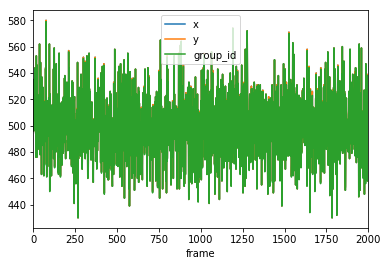

In [436]:
df.groupby("frame").count().plot()

In [456]:
junk = pd.DataFrame(np.random.randn(1000000, 3))

In [457]:
to_change = junk[0] < 0
%timeit junk[1].where(~to_change, np.nan)
%timeit junk.loc[to_change, 1] = np.nan
%timeit junk.at[to_change, 1] = np.nan

7.93 ms ± 90.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.26 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.4 ms ± 430 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [473]:
junk2 = np.random.randn(1000000, 4)

In [474]:
to_change = junk2[:, 0] < 0

In [475]:
%timeit junk2[:, 1] = np.where(to_change, junk2[:, 1], np.nan)

11.5 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [476]:
%timeit junk2[to_change, 1] = np.nan

8.5 ms ± 469 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
